***K-MEANS CLUSTERING***

In [3]:
#Import Library

from scipy.stats import zscore
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
import random as rd
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Memasukkan dan menampilkan dataset
data = pd.read_csv('/content/data-jumlah-sekolah-menengah-pertama-smp-negeri-dan-swasta-di-kota-bekasi.csv', index_col = 0)
data

,NO KEC,KECAMATAN,JUMLAH SMP NEGERI,JUMLAH SMP SWASTA,JUMLAH TOTAL SEKOLAH
NO,,,,,
1,32.75.01,Bekasi Timur,7,25,32
2,32.75.02,Bekasi Barat,5,16,21
3,32.75.03,Bekasi Utara,7,33,40
4,32.75.04,Bekasi Selatan,6,15,21
5,32.75.05,Rawalumbu,5,23,28
6,32.75.06,Medansatria,3,26,29
7,32.75.07,Bantargebang,3,7,10
8,32.75.08,Pondokgede,4,19,23
9,32.75.09,Jatiasih,7,30,37


In [5]:
#Melihat informasi dari setiap data type variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NO KEC                12 non-null     object
 1   KECAMATAN             12 non-null     object
 2   JUMLAH SMP NEGERI     12 non-null     int64 
 3   JUMLAH SMP SWASTA     12 non-null     int64 
 4   JUMLAH TOTAL SEKOLAH  12 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 576.0+ bytes


In [6]:
#Melihat dimensi data (jumlah row dan kolom) dengan menggunakan atribut shape
print (data.shape)

(12, 5)


In [7]:
#Melihat Summary dengan describe, Fungsi ini menampilkan statistik untuk atribut numerik dari dataset
print (data.describe())

       JUMLAH SMP NEGERI  JUMLAH SMP SWASTA  JUMLAH TOTAL SEKOLAH
count          12.000000          12.000000             12.000000
mean            4.666667          20.250000             24.916667
std             1.922751           7.521182              8.887768
min             1.000000           7.000000             10.000000
25%             3.000000          14.750000             20.000000
50%             5.000000          20.000000             24.500000
75%             6.250000          25.250000             29.750000
max             7.000000          33.000000             40.000000


In [8]:
#Menampilkan Korelasi pada setiap kolom
data.corr()

<ipython-input-8-704509633fb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,JUMLAH SMP NEGERI,JUMLAH SMP SWASTA,JUMLAH TOTAL SEKOLAH
JUMLAH SMP NEGERI,1.000000,0.647494,0.764271
JUMLAH SMP SWASTA,0.647494,1.000000,0.986316
JUMLAH TOTAL SEKOLAH,0.764271,0.986316,1.000000


In [9]:
#Menentukan variabel yang akan di proses kluster
sekolah = data.iloc[:, 2:4]
sekolah

,JUMLAH SMP NEGERI,JUMLAH SMP SWASTA
NO,,
1,7,25
2,5,16
3,7,33
4,6,15
5,5,23
6,3,26
7,3,7
8,4,19
9,7,30


<Axes: xlabel='JUMLAH SMP NEGERI', ylabel='JUMLAH SMP SWASTA'>

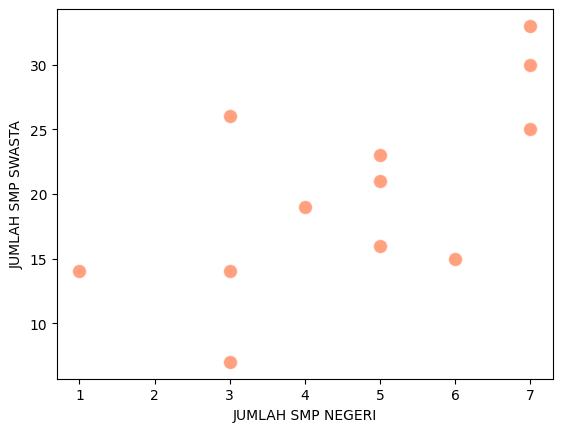

In [10]:
#Penyebaran data dengan variabel x dan y
sns.scatterplot(x="JUMLAH SMP NEGERI", y="JUMLAH SMP SWASTA", data=data, s=100, color="orangered", alpha = 0.5)

In [11]:
#Mengubah variabel yang sebelumnya berbentuk data frame menjadi array
x_array = np.array(sekolah)
print(x_array)

[[ 7 25]
 [ 5 16]
 [ 7 33]
 [ 6 15]
 [ 5 23]
 [ 3 26]
 [ 3  7]
 [ 4 19]
 [ 7 30]
 [ 3 14]
 [ 5 21]
 [ 1 14]]


In [12]:
#Proses standarisasi
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.        , 0.69230769],
       [0.66666667, 0.34615385],
       [1.        , 1.        ],
       [0.83333333, 0.30769231],
       [0.66666667, 0.61538462],
       [0.33333333, 0.73076923],
       [0.33333333, 0.        ],
       [0.5       , 0.46153846],
       [1.        , 0.88461538],
       [0.33333333, 0.26923077],
       [0.66666667, 0.53846154],
       [0.        , 0.26923077]])

In [13]:
#Menentukan dan mengkonfigurasikan kluster dari data
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [14]:
#Mencari nilai pusat dari masing masing kluster
print (kmeans.cluster_centers_)

[[1.         0.85897436]
 [0.61111111 0.5       ]
 [0.22222222 0.17948718]]


In [15]:
#Menambahkan dan menampilkan hasil kluster ke dalam kolom data frame
print (kmeans.labels_)
data["kluster"] = kmeans.labels_
data

[0 1 0 1 1 1 2 1 0 2 1 2]


,NO KEC,KECAMATAN,JUMLAH SMP NEGERI,JUMLAH SMP SWASTA,JUMLAH TOTAL SEKOLAH,kluster
NO,,,,,,
1,32.75.01,Bekasi Timur,7,25,32,0
2,32.75.02,Bekasi Barat,5,16,21,1
3,32.75.03,Bekasi Utara,7,33,40,0
4,32.75.04,Bekasi Selatan,6,15,21,1
5,32.75.05,Rawalumbu,5,23,28,1
6,32.75.06,Medansatria,3,26,29,1
7,32.75.07,Bantargebang,3,7,10,2
8,32.75.08,Pondokgede,4,19,23,1
9,32.75.09,Jatiasih,7,30,37,0


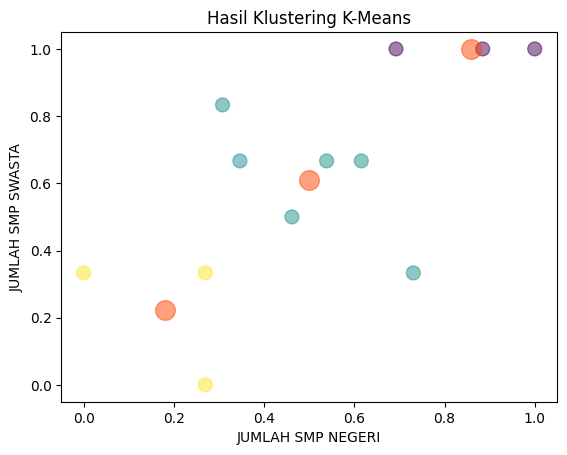

In [16]:
#Visualisasi hasil kluster agar hasilnya terlihat dengan jelas
fig, ax = plt.subplots()
sct= ax.scatter(x_scaled[:,1], x_scaled[:,0], s =100,
                c =data.kluster, marker = "o", alpha=0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='orangered', s=200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("JUMLAH SMP NEGERI")
plt.ylabel("JUMLAH SMP SWASTA")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3)
data = data[['JUMLAH SMP NEGERI', 'JUMLAH SMP SWASTA']]
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
#Membuat dan menambahkan label
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
mapping_dict = {0: 'Recommended', 1: 'Moderate', 2: 'Not Recommended'}
mapped_predictions = [mapping_dict[i] for i in labels]

In [19]:
#Menampilkan label yang telah dibuat
data["label"] = mapped_predictions
data

<ipython-input-19-49189e84dc36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = mapped_predictions


,JUMLAH SMP NEGERI,JUMLAH SMP SWASTA,label
NO,,,
1,7,25,Recommended
2,5,16,Moderate
3,7,33,Not Recommended
4,6,15,Moderate
5,5,23,Recommended
6,3,26,Recommended
7,3,7,Moderate
8,4,19,Recommended
9,7,30,Not Recommended


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JUMLAH SMP NEGERI  12 non-null     int64 
 1   JUMLAH SMP SWASTA  12 non-null     int64 
 2   label              12 non-null     object
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


***CLASSIFICATION***

In [21]:
#Import Library beberapa model dari classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Split dataset dan variabel target
feature_cols = ['JUMLAH SMP NEGERI', 'JUMLAH SMP SWASTA']
x = data[feature_cols]
y = data.label

In [23]:
#Pemisahan data menjadi set pelatihan dan set pengujian
#Pelatihan data (80%)
#Pengujian data (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
#Membuat klasifikasi prediksi, akurasi menggunakan Pohon Keputusan (Decision Tree)
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth =100)
clf = clf.fit (x_train, y_train)
y_pred = clf.predict(x_test)
accDT = metrics.accuracy_score(y_test,y_pred)

In [25]:
#Membuat klasifikasi prediksi, akurasi menggunakan Support Vector Machine (SVM)
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
accSVM = metrics.accuracy_score(y_test,y_pred)

In [26]:
#Membuat klasifikasi prediksi, akurasi menggunakan Naive Bayes
gnb = GaussianNB()
gnb.fit (x_train, y_train)
y_pred = gnb.predict(x_test)
accNB = metrics.accuracy_score(y_test, y_pred)

In [27]:
#Membuat klasifikasi prediksi, akurasi menggunakan K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accKNN = metrics.accuracy_score(y_test, y_pred)

In [28]:
#EVALUASI HASIL PENGUJIAN
#Menampilkan hasil akurasi dengan beberapa model yang sudah dibuat
print("-----------------------------------")
print("HASIL AKURASI DENGAN BEBERAPA MODEL")
print("-----------------------------------")
print("  Decision Tree :",accDT)
print("      SVM       :",accSVM)
print("   Naive Bayes  :",accNB)
print("      KNN       :",accKNN)

-----------------------------------
HASIL AKURASI DENGAN BEBERAPA MODEL
-----------------------------------
  Decision Tree : 1.0
      SVM       : 1.0
   Naive Bayes  : 0.75
      KNN       : 0.75
